In [34]:
# Llamado de librerias
library(dplyr)
library(ggplot2)
library(patchwork)

In [98]:
# Semilla de datos
set.seed(1234)

# ARMA[2, 2]

In [99]:
# Parámetros
sigma_a = 1
Phi = c(-0.09, 0.1312)
Theta = c(0.03, -0.258)
A = c(0.6706322, 0.3293678)
K = 120                                         # Observaciones

In [100]:
Zt = matrix(data = c(A), nrow = K, ncol = (sigma_a + 1))
a = rnorm(N, mean = 0, sd = j)
for (j in 0 : sigma_a){
    
    for (i in (length(A) + 1) : K){
        Zt[i, j] = Phi[1] * Zt[(i - 1)] + Phi[2] * Zt[(i - 2)] + a[i] - Theta[1] * a[(i - 1)] - Theta[2] * a[(i - 2)]
    }
}


head(Zt)

0.6706322,0.6706322
0.3293678,0.3293678
0.8230392,0.6706322
-2.3375147,0.3293678
1.0976405,0.6706322
-0.5174774,0.3293678


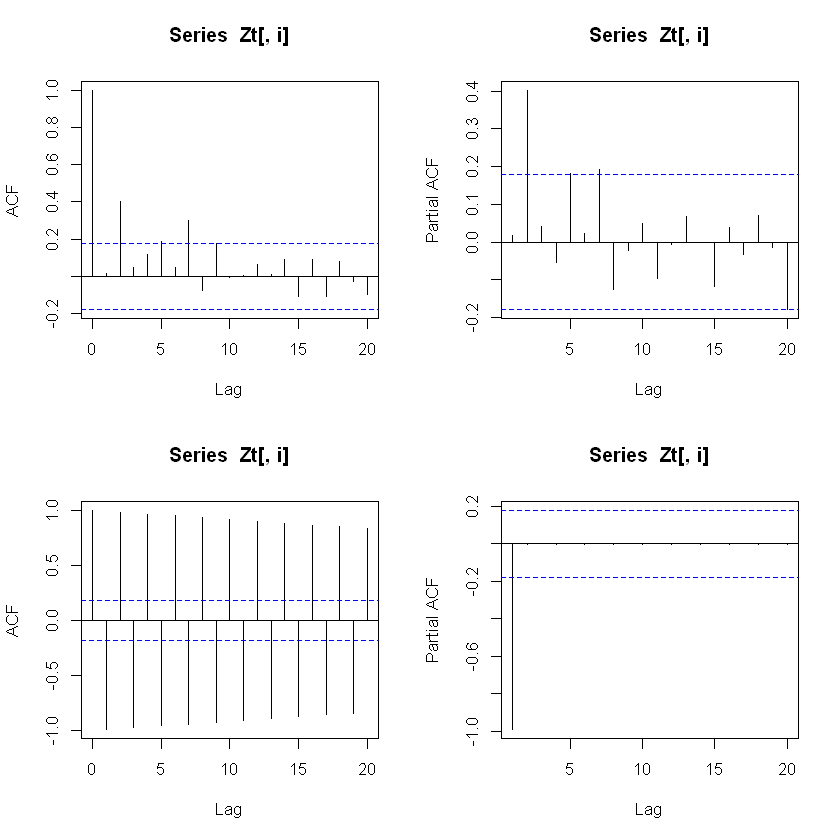

In [101]:
par (mfrow = c((sigma_a + 1), 2))
for (i in 1 : (sigma_a + 1)){
    acf(Zt[, i])
    pacf(Zt[, i])
}


# ARMA[5, 3]

In [102]:
# Parámetros
sigma_a = 1
Phi = c(-0.09, 0.1312, 0.095, 0.000000000000006, 0.2)
Theta = c(0.03, 0.004, -0.03)
A = c(0.6706322, 0.3293678, 0.036, 0.756, 0.45)
K = 120        

In [103]:
Zt = matrix(data = c(A), nrow = K, ncol = (sigma_a + 1))
for (j in 0 : sigma_a){
    a = rnorm(120, mean = 0, sd = j)
    for (i in (length(A) + 1) : K){
        Zt[i, j] = Phi[1] * Zt[(i - 1)] + Phi[2] * Zt[(i - 2)] + Phi[3] * Zt[(i - 3)] + Phi[4] * Zt[(i - 4)] + Phi[5] * Zt[(i - 5)]  + a[i] - Theta[1] * a[(i - 1)] - Theta[2] * a[(i - 2)] - Theta[3] * a[(i - 3)]
    }
}


head(Zt)

0.6706322,0.6706322
0.3293678,0.3293678
0.0360000,0.0360000
0.7560000,0.7560000
0.4500000,0.4500000
0.2803099,0.6706322


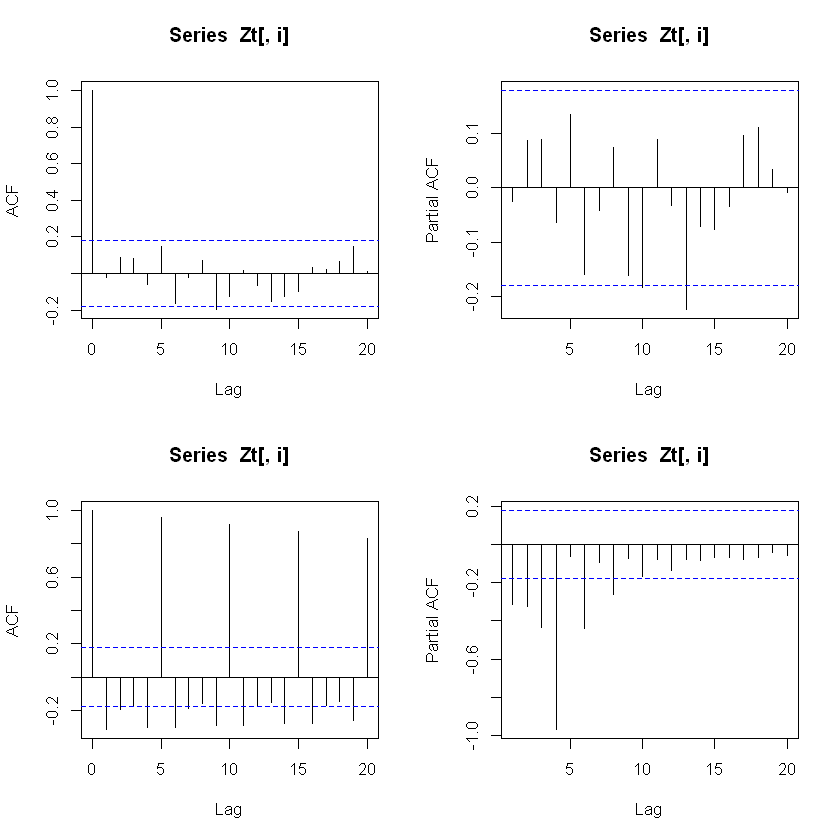

In [104]:
par (mfrow = c((sigma_a + 1), 2))
for (i in 1 : (sigma_a + 1)){
    acf(Zt[, i])
    pacf(Zt[, i])
}

# ARMA[3, 12]

In [105]:
# Parámetros
sigma_a = 1
Phi = c(-0.09, 0.1312, 0.095)
Theta = c(0.03, 0.004, -0.03, 0, 0, 0, 0, 0, 0, 0.34, 0.020, 062)
A = c(0.6706322, 0.3293678, 0.036)
K = 120        

In [106]:
Zt = matrix(data = c(A), nrow = K, ncol = (sigma_a + 1))
Num_T = length(Theta)
for (j in 0 : sigma_a){
    a = rnorm(K, mean = 0, sd = j)
    for (i in (length(Theta) + 1) : K){
        Zt[i, j] = Phi[1] * Zt[(i - 12)] + Phi[2] * Zt[(i - 11)] + Phi[3] * Zt[(i - 10)] + a[i] - Theta[1] * a[(i - 1)] - Theta[2] * a[(i - 2)] - Theta[3] * a[(i - 3)] - Theta[10] * a[(i - 10)] - Theta[11] * a[(i - 11)] - Theta[12] * a[(i - 12)]
    }
}

head(Zt)

0.6706322,0.6706322
0.3293678,0.3293678
0.0360000,0.0360000
0.6706322,0.6706322
0.3293678,0.3293678
0.0360000,0.0360000


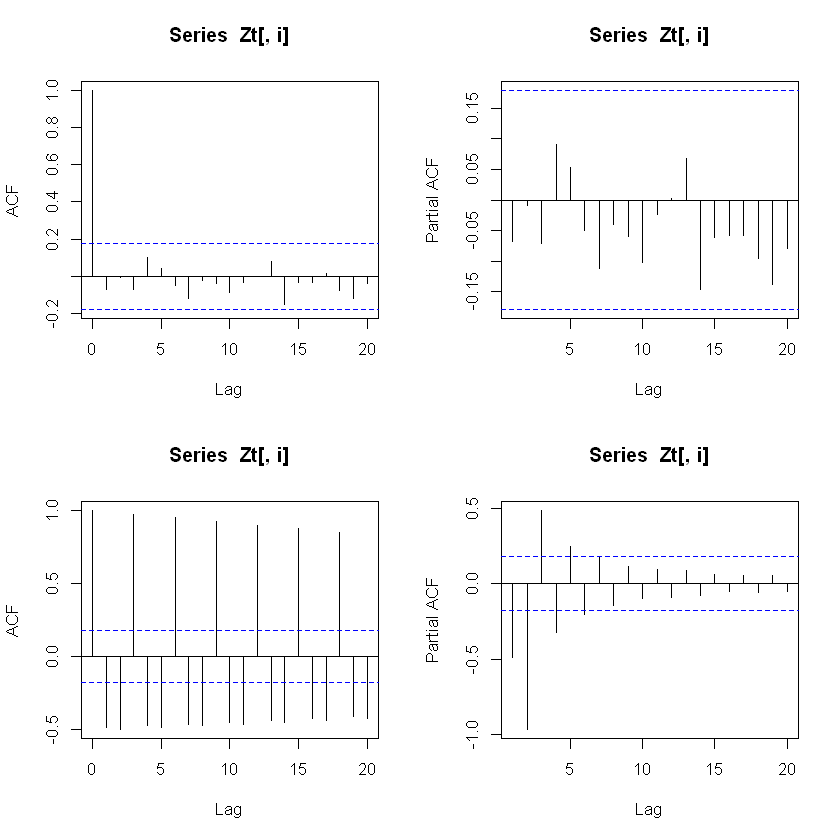

In [107]:
par (mfrow = c((sigma_a + 1), 2))
for (i in 1 : (sigma_a + 1)){
    acf(Zt[, i])
    pacf(Zt[, i])
}

In [23]:
At = (1:500)
T = length(At)
K = 120
t = 2
J_opt = 0
AR_P = 1
alpha = 0.05
MA_Q = 1

In [25]:
Rho_at = matrix(data = NA, nrow = (T - K), ncol = 1)
for (i in 1 : (T - K)){
    Rho_at[i] = sum(At[i] * At[(i + t)]) / sum(At ** 2)
}

# Prueba de Ljung - Box
Q = (T - J_opt - AR_P) * (T - J_opt - AR_P + 2) * sum((sum(Rho_at) ** 2) / (T - J_opt - AR_P - K)) 
Vc = qchisq(p = alpha, df = (K - AR_P - MA_Q))

# Salida
if (Q < Vc){
    print(sprintf('No hay suficiente evidencia para rechazar independencia en los erorres con un alpha de %s', alpha))
} else {
    print(sprintf('Hay suficiente evidencia para rechazar independencia en los erorres con un alpha de %s', alpha))
} 

print(sprintf("Q' = %s", Q))
Vc

[1] "Hay suficiente evidencia para rechazar independencia en los erorres con un alpha de 0.05"
[1] "Q' = 129.366943877923"


[1] 93.91829